![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcREYV9sXfo_8FdHZ4MVHjN_LmXIUNKCvk6BbA&usqp=CAU)

hello alll 

hope your are fine with good health  

so, in this notebook i will try to do all end to end ml .. i mean from EDA(Exploratory Data Analysis) to Deploying the Final Trained Model 

generally the common  path of any end to end ML Project is like 

* Data Collection and Problem Statement
* Exploratory Data Analysis 
* Data Preparation(feature engineering)
* Selecting and Training a few Machine Learning Models
* Cross-Validation and Hyperparameter Tuning
* Deploying the Final Trained Model  

let me try all this in this notebook 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler


from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats


import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [ ]:
data = pd.read_csv("../input/spotify-dataset-19212020-160k-tracks/data.csv")
data_gen = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv')
data_w_gen = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv')
data_yr = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_year.csv')
data_ar = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv')
data_top50 = pd.read_csv("../input/top50spotify2019/top50.csv",encoding='ISO-8859-1')
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

### firstly lets check for all the alalysis with target  that is   ...  "popularity" .... and before going to the analysis lets check for the Feature Correlation by consibering few features

for this i'm going to use [yellowbrick](https://www.scikit-yb.org/en/latest/index.html) ... 

In [ ]:

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       

great .. totally we hvae 9 features with +ve correlation and 5 -ve .... 

In [ ]:
total = data.shape[0]
popularity_score_more_than_40 = data[data['popularity'] > 40].shape[0]

probability = (popularity_score_more_than_40/total)*100
print("Probability of song getting more than 40 in popularity :", probability)

so popularity ranges from 0 to 100 ... so  Probability of song getting more than 40 is just 38.1 , well getting a song popular is bit difficult task right !!

**before moving to the complete features analysis lets just check for features with more than 0.4 correlation**

displot for the feartures .

In [ ]:
features_o = ['energy','loudness','year']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(data['energy'])

plt.subplot(1, 3, 2)
sns.distplot(data['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(data['year'])

plt.suptitle('Checking Feature with more corre ', fontsize = 10)
plt.show()

Probplot for the feartures .

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
res = stats.probplot(data['energy'], plot=plt)

plt.subplot(1, 3, 2)
res = stats.probplot(data['loudness'], plot=plt)

plt.subplot(1, 3, 3)
res = stats.probplot(data['year'], plot=plt)

# Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['popularity'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

# bivariate analysis 

### Loudness VS Pupolarity

> **"Loudness" of the song VS "popularity" by "years" with  Size "key" and for two binary attributes "explict" of the song and "mode" of the song**

In [ ]:
x = data.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x["loudness"].values, x['popularity'].values, color=color[4])
plt.ylabel('loudness', fontsize=12)
plt.xlabel('popularity', fontsize=12)
plt.title("popularity wise loudness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="loudness", y="popularity",
    hue="year", size="key",col="explicit",
    palette=cmap, sizes=(10, 200)
)

g.despine(left=True, bottom=True)


cmap_ = sns.cubehelix_palette(rot=-.30, as_cmap=True)
g = sns.relplot(
    data=data,
    x="loudness", y="popularity",
    hue="year", size="key",col="mode",
    palette=cmap_, sizes=(10, 200),
)

g.despine(left=True, bottom=True)

lets check out the relation

In [ ]:
fig1 = sns.jointplot(x="loudness", y="popularity", data=data.sample(10000),
                  kind="reg", truncate=False,
                  color=color[3])

hmm.. good this Loudness have good relation with popularity .. wel loud songs get more popularity ?? 

Audio characteristics like "acousticness","danceability","energy","speechiness","liveness","valence" over year 

In [ ]:
data_w_gen['genres'].value_counts()

if i assume "[]" as a null place r missing values..... as we can  there are Top 4 genres 

* Movie tunnes 
* show tunnes
* classical piano 
* sleep 

as we all know that based on the genres we the Audio Characteristics will change by key(All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…) used. so now lets check for some  Audio Characteristics like "acousticness", "danceability", "speechiness", "energy" and "valence" ..... as all this valuses are in range of 0 to 1 i hope we can see a clear change..... lets see 

In [ ]:
df_movie_tunes = data_w_gen[data_w_gen['genres'] == "['movie tunes']"]
df_show_tunes = data_w_gen[data_w_gen['genres'] == "['show tunes']"]
df_classical_piano = data_w_gen[data_w_gen['genres'] == "['classical piano']"]
df_sleep = data_w_gen[data_w_gen['genres'] == "['sleep']"]

In [ ]:
#so lets check all the audio characteristics with top 4 geners 
# first lets start with "movie tunne" which is on TOP 1
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="key", y="acousticness", data=df_movie_tunes, color="b",label = 'acousticness')
sns.lineplot(x="key", y="danceability", data=df_movie_tunes, color="r",label = 'danceability')
sns.lineplot(x="key", y="speechiness", data=df_movie_tunes, color="g",label = 'speechiness')
sns.lineplot(x="key", y="energy", data=df_movie_tunes, color="y",label = 'energy')
sns.lineplot(x="key", y="valence", data=df_movie_tunes, color="m",label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "Movie tunes" data by the Key used')
ax.legend(fontsize = 14)

# now lets check for top2 gener that is show tunes

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="key", y="acousticness", data=df_show_tunes, color="b",label = 'acousticness')
sns.lineplot(x="key", y="danceability", data=df_show_tunes, color="r",label = 'danceability')
sns.lineplot(x="key", y="speechiness", data=df_show_tunes, color="g",label = 'speechiness')
sns.lineplot(x="key", y="energy", data=df_show_tunes, color="y",label = 'energy')
sns.lineplot(x="key", y="valence", data=df_show_tunes, color="m",label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "Show Tunes" data by the Key used')
ax.legend(fontsize = 14)

# now lets check for top3 gener that is classical piano 
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":3})

sns.barplot(x="key", y="acousticness", data=df_classical_piano, color="b", label = 'acousticness')
sns.barplot(x="key", y="danceability", data=df_classical_piano, color="r", label = 'danceability')
sns.barplot(x="key", y="speechiness", data=df_classical_piano, color="g", label = 'speechiness')
sns.barplot(x="key", y="energy", data=df_classical_piano, color="y", label = 'energy')
sns.barplot(x="key", y="valence", data=df_classical_piano, color="m", label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "classical piano" data by the Key used')
ax.legend(fontsize=14)

# now lets check for top3 gener that is sleep betts 
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":3})

sns.barplot(x="key", y="acousticness", data=df_sleep, color="b", label = 'acousticness')
sns.barplot(x="key", y="danceability", data=df_sleep, color="r", label = 'danceability')
sns.barplot(x="key", y="speechiness", data=df_sleep, color="g", label = 'speechiness')
sns.barplot(x="key", y="energy", data=df_sleep, color="y", label = 'energy')
sns.barplot(x="key", y="valence", data=df_sleep, color="m", label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "sleep betts" data by the Key used')
ax.legend(fontsize=14)

* as we can see here in most of the genres "acousticness" have more affect 
* "movie tunes" and "show Tunnes" looks like they have their Audio characteristics "valence" as low and "acousticness" as high 
* "classical piano" genres have "acousticness" as most no "speechiness" and "energy"
* generally "sleep betts" should be with low "acousticness" and "danceability" ... the same we can see .... 

In [ ]:
data['artists'].value_counts()

i am very bad at russian i cant understand few names but its ok i have google... .....so  as we can see there are Top 5 artists  

* Эрнест Хемингуэй (Ernest Hemingway ) 
* Francisco Canaro 
* Эрих Мария Ремарк (Erich Maria Remarque) 
* Ignacio Corsini
* Frank Sinatra 

as we all know that artists based on the genres and their creativity they make songs so now lets make a analysis of Audio Characteristics by each artists   lets use few Audio Characteristics like "acousticness", "danceability", "speechiness", "energy" and "valence" ..... as all this valuses are in range of 0 to 1 i hope we can see a clear change..... lets hope so ..

In [ ]:
df_top1 = data[data['artists'] == "['Эрнест Хемингуэй']"]
df_top2 = data[data['artists'] == "['Francisco Canaro']"]
df_top3 = data[data['artists'] == "['Эрих Мария Ремарк']"]
df_top4 = data[data['artists'] == "['Ignacio Corsini']"]
df_top5 = data[data['artists'] == "['Frank Sinatra']"]

In [ ]:

# for energy
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['energy'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['energy'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['energy'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['energy'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['energy'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('energy DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for valence
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['valence'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['valence'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['valence'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['valence'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['valence'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('valence DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# danceability
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['danceability'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['danceability'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['danceability'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['danceability'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['danceability'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('danceability DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for liveness
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['liveness'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['liveness'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['liveness'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['liveness'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['liveness'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('liveness DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for loudness
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['loudness'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['loudness'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['loudness'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['loudness'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['loudness'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('loudness DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# fro tempo 
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['tempo'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['tempo'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['tempo'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['tempo'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['tempo'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('tempo DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)


lets maek analysis for the key and the mode with all different Audio Characteristics 

In [ ]:
chart = sns.catplot(x="key", y="acousticness", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="danceability", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="energy", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="speechiness", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

lets try seeing in form of Wordcloud for top50 Artist songs in 2019 

In [ ]:
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = data_top50["Artist.Name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

### Liveness VS Pupolarity

> **"liveness" of the song VS "popularity" by "years" with  Size "key" and for two binary attributes "explict" of the song and "mode" of the song**

In [ ]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="liveness", y="popularity",
    hue="year", size="key",col="explicit",
    palette=cmap, sizes=(10, 200),
)

g.despine(left=True, bottom=True)


cmap_ = sns.cubehelix_palette(rot=-.30, as_cmap=True)
g = sns.relplot(
    data=data,
    x="liveness", y="popularity",
    hue="year", size="key",col="mode",
    palette=cmap_, sizes=(10, 200),
)

g.despine(left=True, bottom=True)

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="loudness", y="duration_ms",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data, ax=ax[0]).set(title='loudness with data.csv')
sns.scatterplot(x="loudness", y="duration_ms",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[1]).set(title='loudness with data_genres.csv')

usually by years and technology the instruments in music had a great change i feel ... 
..
so lets check the change of Audio characteristics over year once 

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year in Data.csv')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

hope you can see the difference 

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['key'], palette = 'BuPu')
plt.title('Comparison of key', fontweight = 30, fontsize = 20)
plt.xlabel('key')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from yellowbrick.features import JointPlotVisualizer


feature_names_art = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']

X, y = data_ar[feature_names_art], data_ar['popularity']

features = np.array(feature_names_art)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="danceability")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()  

tempo by artist ... 

In [ ]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="tempo")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show() 

loudness by artist ... 

In [ ]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="loudness")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show() 

liveness by artist ... 

In [ ]:
visualizer = JointPlotVisualizer(columns="liveness")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()

lets check with the target ....... "**popularity**"

> * **"popularity VS "loudness" by "years" and with size "key"** 
> * **"popularity VS "liveness" by "years" and with size "key"**

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="liveness", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[0]).set(title='...liveness...')
sns.scatterplot(x="loudness", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[1]).set(title='...loudness...')

> * **"popularity VS "danceability" by "years" and with size "key"** 
> * **"popularity VS "tempo" by "years" and with size "key"**

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="danceability", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[0]).set(title='...danceability...')
sns.scatterplot(x="tempo", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[1]).set(title='...tempo...')

# build and deploy the model 

- ok ...!! now lets try to build and deploy the model  

i am going to use only few Audio characteristics with just 30000 records for model ..

In [ ]:
use_col = ['acousticness','danceability','loudness','popularity','duration_ms','energy','speechiness','valence']

In [ ]:
df_mod = pd.read_csv('../input/spotify-dataset-19212020-160k-tracks/data.csv', usecols=use_col,nrows=30000)
df_mod.to_csv('file1.csv') 
df_mod.head()

In [ ]:
cor = df_mod.corr()
sns.heatmap(cor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = df_mod.drop(columns=['popularity'])
y = df_mod['popularity']

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [ ]:
print("num of  train sample in train set:",x_train.shape)
print("Number of samples in validation set:",y_test.shape)

i am not going to concentrate more on modelling(i hope all of us are good at making modelling) but more on deploying the modle as a wed app

i feel 


## "No machine learning model is valuable, untill & unless it’s deployed to production."


In [ ]:
#model = RandomForestRegressor()
#n_estim = range(100,1000,100)
#param_grid = {"n_estimators":n_estim}
#model_rf = GridSearchCV(model, param_grid=param_grid,cv=5, scoring='r2',n_jobs=4, verbose=1)

#model_rf.fit(x_train, y_train)
#print(model_rf.best_score_)
#model_rf.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

to deploy as model we need to save the model and use that for making predicts.... so lets save the model using .pkl 

In [ ]:
mymodle = open('fordeploy.pkl', 'wb')

In [ ]:
import pickle 

pickle.dump(random_forest,mymodle,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
mymodle.close()

In [ ]:
import numpy as np 
import pickle

mymodel = open('fordeploy.pkl', 'rb')

model = pickle.load(mymodel)

data = np.array([0.995,0.708,158648,0.1950,	-12.428,0.0506,0.7790])
data = data.reshape(1,-1)

pre = model.predict(data)
print(pre)

done ...!! we are actually done with simply model that is "RandomForestRegressor" ... so now all we need to so is creating ...

### API (application programming interface)

for this we have so many way to do but out of all let me try 

* ## [Streamlit](https://www.streamlit.io/) 
* ## [Flask](https://flask.palletsprojects.com/en/1.1.x/)

to install Streamlit 

> ### pip install Streamlit

### one advantage of Streamlit is we dont need compelete html code for wed app it will integrate by itself .. and veary simply to code for any machine learning model for complete code and go through the [documentation](https://docs.streamlit.io/en/stable/) 

In [ ]:
import streamlit as st 
import streamlit.components.v1 as components 

# load the saved model 
pickle_in = open("fordeploy.pkl","rb")
model=pickle.load(pickle_in)


def predict_popu(acousticness,danceability,duration_ms,energy,loudness,speechiness,valence):
    """
    this method is for prediction process 
    takes all the Audio characteristics thtat we used for modelling and returns the prediction 
    """
    prediction=model.predict([[acousticness,danceability,duration_ms,energy,loudness,speechiness,valence]])
    print(prediction)
    return prediction



def main():
    st.title("Spotify songs")
     
    html_temp2 = """
		<div style="background-color:royalblue;padding:10px;border-radius:10px">
		<h2 style="color:white;text-align:center;">Spotify songsr </h2>
        <h1 style="color:white;text-align:center;">Popularity prediction</h1>
		</div>
		"""
    # a simple html code for heading which is in blue color and we can even use "st.write()" also ut for back ground color i used this HTML ..... 
    #  to render this we use ...
    components.html(html_temp2)
    # components.html() will render the render the 

    components.html("""
                <img src="https://www.tech-recipes.com/wp-content/uploads/2016/02/Spotify.png" width="700" height="150">
                
                """)
    # this is to insert the image the in the wed app simple <imag/> tag in HTML
    
    #now lets get the test input from the user by wed app 
    # for this we can use "st.text_input()" which allows use to get the input from the user 
    
    acousticness = st.text_input("acousticness","Type Here")
    danceability = st.text_input("danceability","Type Here")
    duration_ms = st.text_input("duration_ms","Type Here")
    energy = st.text_input("energy","Type Here")
    loudness = st.text_input("loudness","Type Here")
    speechiness = st.text_input("speechiness","Type Here")
    valence = st.text_input("valence","Type Here")
    result=""
    # done we got all the user inputs to predict and we need a button like a predict button we do that by "st.button()"
    # after hitting the button the prediction process will go on and then we print the success message by "st.success()"
    if st.button("Predict"):
        result=predict_popu(acousticness,danceability,duration_ms,energy,loudness,speechiness,valence)
    st.success('The Popularity of the song is {}'.format(result))
    # one more button saying About ...
    if st.button("About"):
        st.text("Lets LEarn")
        st.text("Built with Streamlit")

if __name__=='__main__':
    main()

so this look simple and neat and easy understanding tooo 

**to run the Streamlit wed app we should use **

> ## streamlit run filename.py 

then this gives use 
- local url and Network url 

and the output looks like this ....


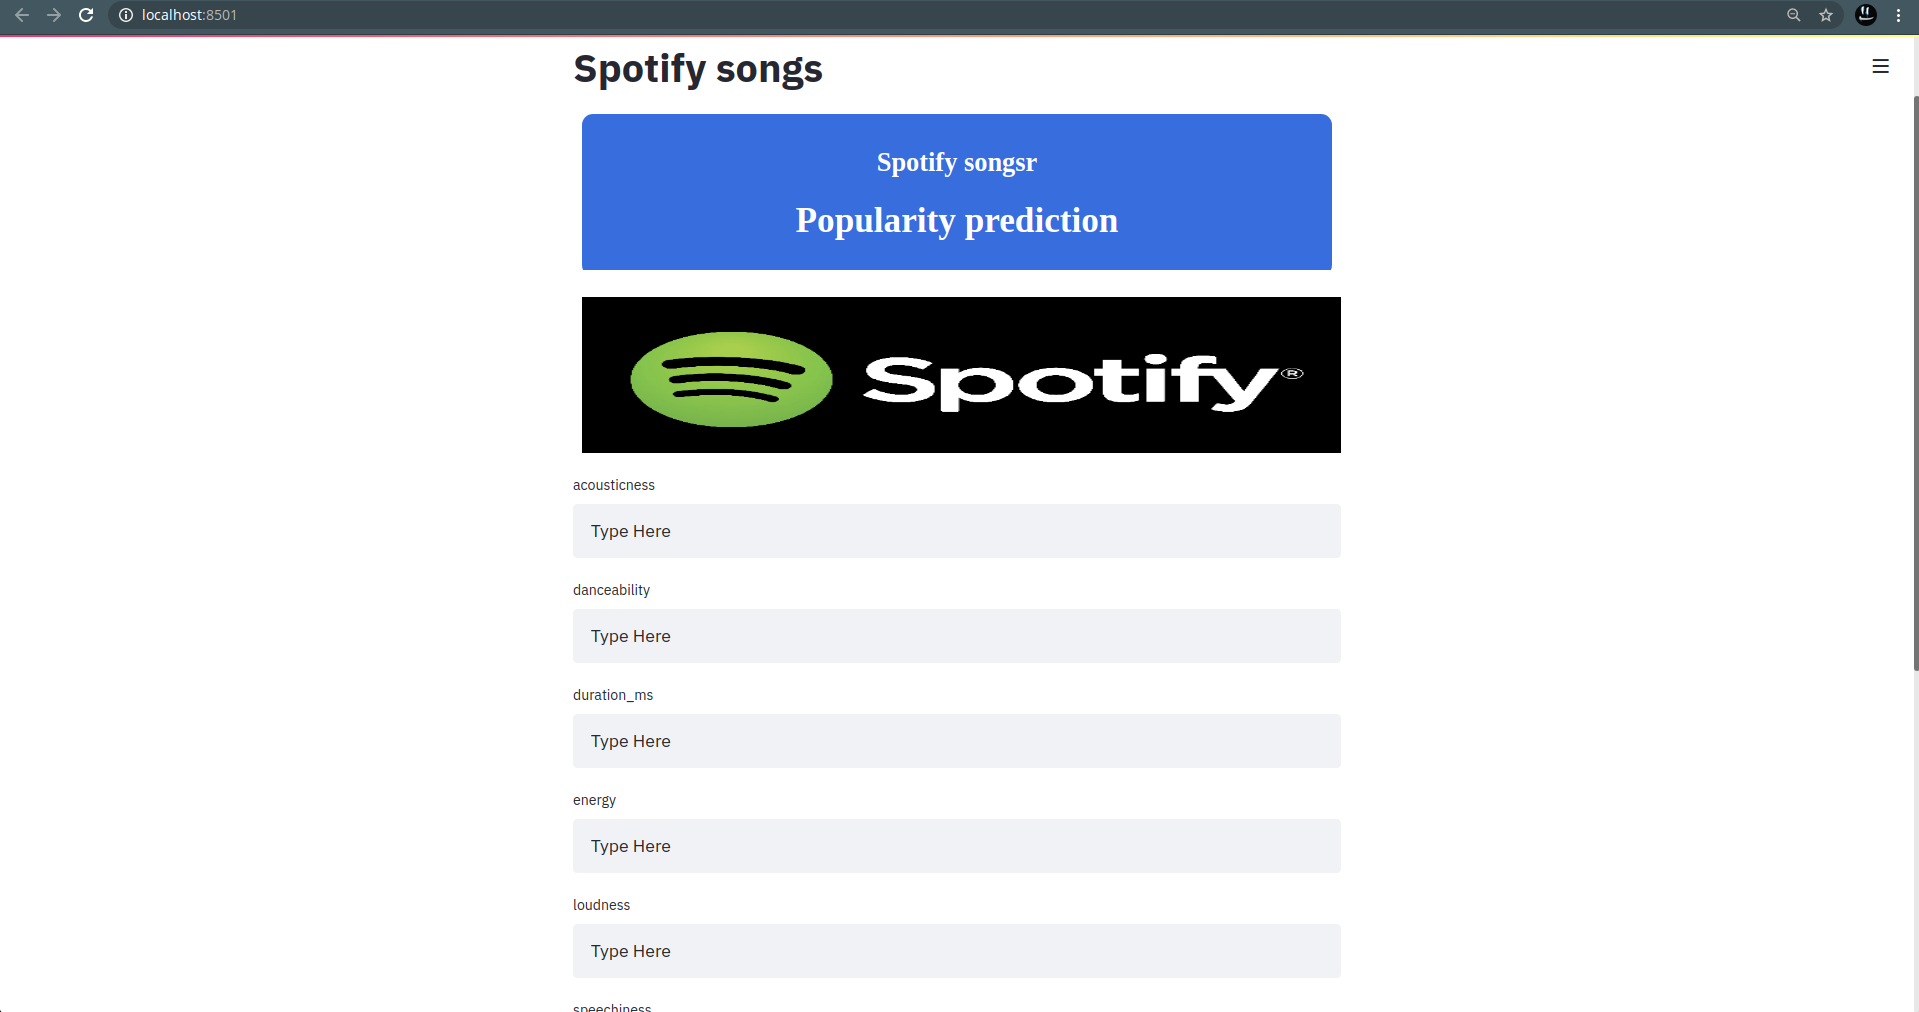

and all we need to do is fill the values and hit predict ...

then the out look likes 

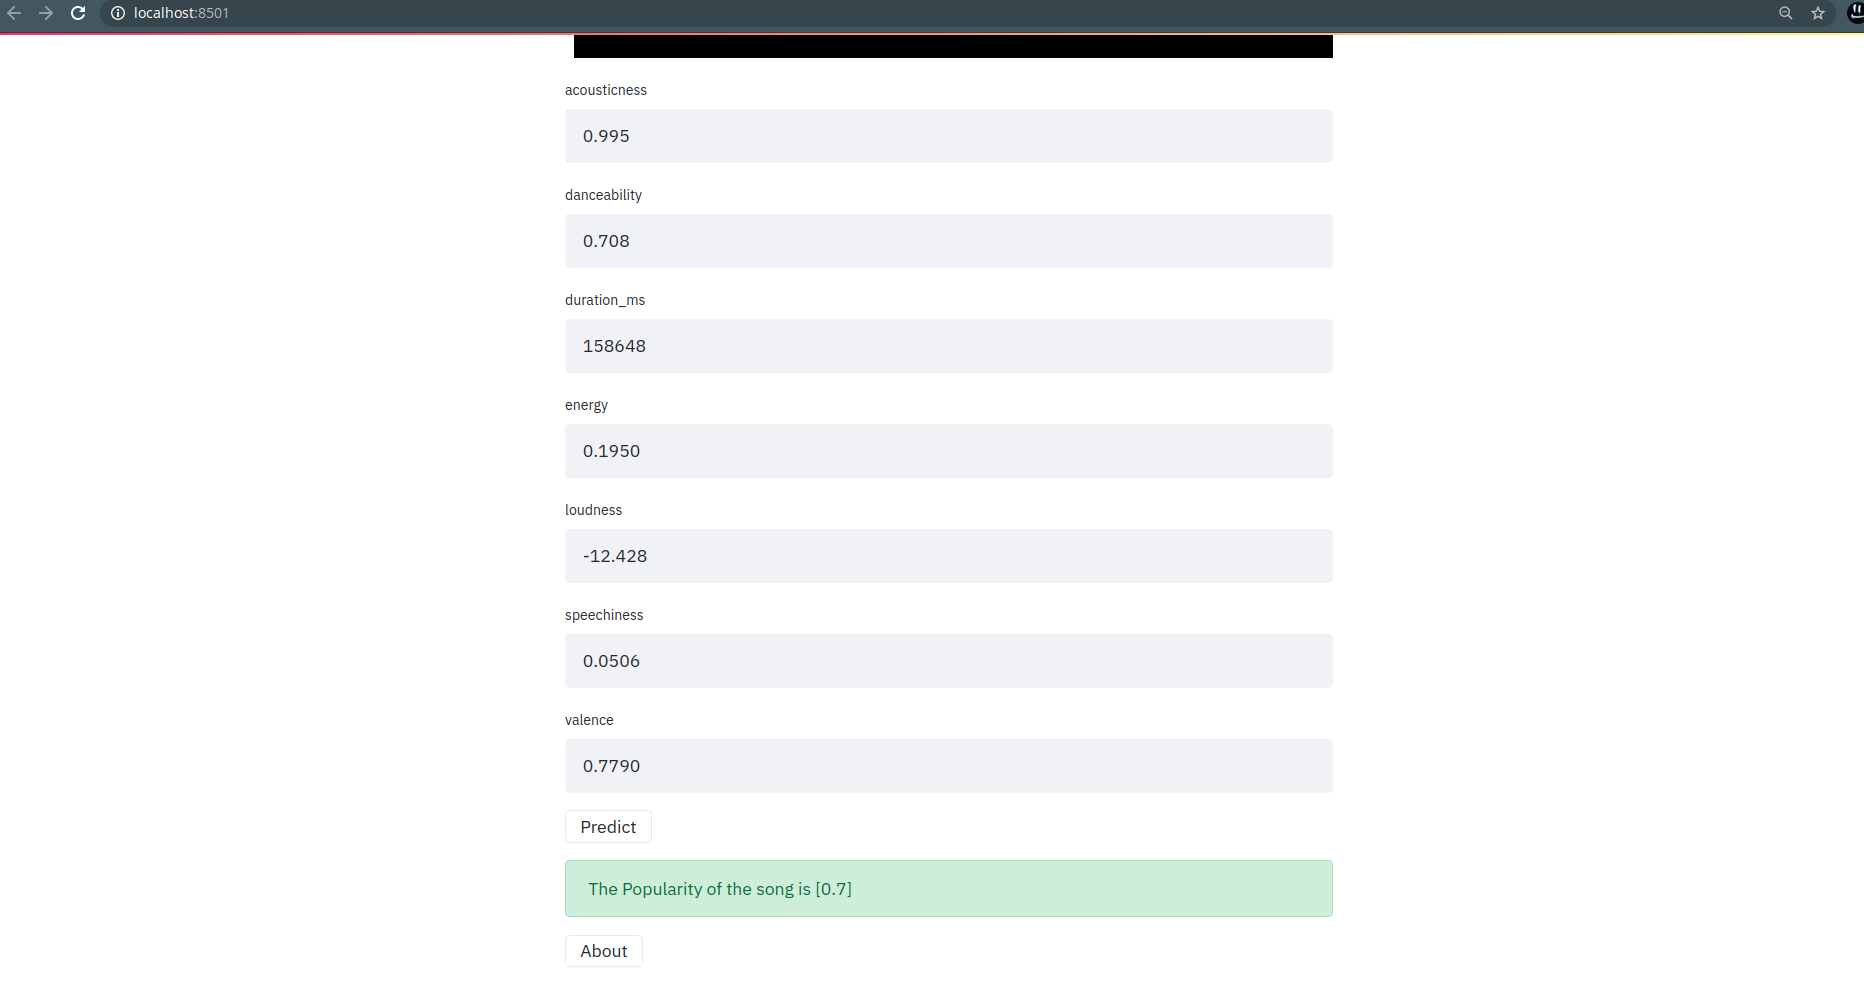

this is so simple and very easy to do likes wish we can actually deploy any machine learning model into production and we do have lots of free colud application platform too like [Heroku](https://www.heroku.com/)there is a simple process to make it public 

i will try to make few notebook on deploying beacause we have so many easy way of doing it like we do have [Gradio](https://gradio.app/) which so simple than streamlit. and i will update the notebook for Flask too 

stay tunned 

### thank you 